In [897]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Reading and Cleaning Data

In [898]:
import pandas as pd
import matplotlib.pyplot as plt
# import numpy as np

import seaborn as sns

In [899]:
df = pd.read_csv("new_dataset.csv")
#Chức năng read_csv đưcoj cung cấp bởi thư viên pandas để đọc tệp CSV
#Đọc file CSV và tạo DataFrame từ nội dung của file CSV(Comma Separated Values)

In [900]:
df.head()
#Một Phương thức của đối tượng DataFrame trong thư viện pandas
#Phương thức hiển thị một số hàng đầu tiên của DF để kiểm tra dữ liệu
#Hiển thị 5 hàng đầu tiên của Data Frame

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,New Lungo,25-01-2018 17:44,evening,weekday
1,1,New Bakewell,25-01-2018 17:44,evening,weekday
2,1,New Bread,25-01-2018 17:44,evening,weekday
3,1,New Valentine's Card,25-01-2018 17:44,evening,weekday
4,1,New Spanish Brunch,25-01-2018 17:44,evening,weekday


In [901]:
df.describe()
# Tạo tóm tắt thống kế các cột số trong DataFrame 
# count: số dòng không bị thiếu dữ liệu trong cột
# mean: giá trị trung bình của các giá trị trong cột
# std: độ lệch chuẩn
# min: giá trị nhỏ nhất trong cột
# 25% 50% 75%: Giá trị của các phần centile 25%, 50% (median), và 75% cho cột.
# max: giá trị lớn nhất trong cột

,Transaction
count,778.000000
mean,50.469152
std,29.309553
min,1.000000
25%,25.000000
50%,49.500000
75%,77.000000
max,100.000000


In [902]:
df.info()
# Phương thức này được sử dụng để cung cấp thông tin tổng quan về DataFrame, bao gồm:

# 1. Tổng số dòng (hàng) trong DataFrame.
# 2. Số lượng cột (biến) trong DataFrame.
# 3. Tên của mỗi cột (biến).
# 4. Số lượng giá trị không bị thiếu (non-null) trong mỗi cột.
# 5. Kiểu dữ liệu của mỗi cột.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      778 non-null    int64 
 1   Item             778 non-null    object
 2   date_time        778 non-null    object
 3   period_day       778 non-null    object
 4   weekday_weekend  778 non-null    object
dtypes: int64(1), object(4)
memory usage: 30.5+ KB


There is no missing value.

In [903]:
# Chuyển đổi cột date_time trong DataFrame thành kiểu dữ liệu datetime
df['date_time'] = pd.to_datetime(df['date_time'])

/var/folders/mq/sgf69n297rq1zmk8qcyg1xx40000gn/T/ipykernel_17802/4237905590.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


In [904]:
df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,New Lungo,2018-01-25 17:44:00,evening,weekday
1,1,New Bakewell,2018-01-25 17:44:00,evening,weekday
2,1,New Bread,2018-01-25 17:44:00,evening,weekday
3,1,New Valentine's Card,2018-01-25 17:44:00,evening,weekday
4,1,New Spanish Brunch,2018-01-25 17:44:00,evening,weekday
5,1,New Adjustment,2018-01-25 17:44:00,evening,weekday
6,1,New Pastry,2018-01-25 17:44:00,evening,weekday
7,1,New Olum & Polenta,2018-01-25 17:44:00,evening,weekday
8,1,New Medialuna,2018-01-25 17:44:00,evening,weekday
9,1,New Mocha,2018-01-25 17:44:00,evening,weekday


In [905]:
# Đếm số lượng khách hàng duy nhất
df['Transaction'].nunique()

100

In [906]:
# Trích xuất thông tin ngày (date) từ cột dữ liệu datetime có tên là "date_time" trong DataFrame "df"
df['date'] = df['date_time'].dt.date

# Trích xuất thông tin thời gian
df['time'] = df['date_time'].dt.time

# Trích xuất tháng và thay thế bằng mô tả đại diện cho các tháng
df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

# Trích xuất giờ
df['hour'] = df['date_time'].dt.hour
# Thay thế giờ bằng các mô tả đại diện khoảng thời gian
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

# Trích xuất ngày trong tuần và thay thế số với mô tả đại diện cho từng ngày trong tuần
df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# Xoá cột 'date_time' khỏi Data Frame và cập nhật Data Frame (inplace=True)
df.drop('date_time', axis = 1, inplace = True)


In [907]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,New Lungo,evening,weekday,2018-01-25,17:44:00,January,17-18,Thursday
1,1,New Bakewell,evening,weekday,2018-01-25,17:44:00,January,17-18,Thursday
2,1,New Bread,evening,weekday,2018-01-25,17:44:00,January,17-18,Thursday
3,1,New Valentine's Card,evening,weekday,2018-01-25,17:44:00,January,17-18,Thursday
4,1,New Spanish Brunch,evening,weekday,2018-01-25,17:44:00,January,17-18,Thursday


In [908]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

In [909]:
df.head()
# Gọi phương thức head() một lần nữa để kiểm tra sự thay đổi của Data Frame

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,new lungo,evening,weekday,2018-01-25,17:44:00,January,17-18,Thursday
1,1,new bakewell,evening,weekday,2018-01-25,17:44:00,January,17-18,Thursday
2,1,new bread,evening,weekday,2018-01-25,17:44:00,January,17-18,Thursday
3,1,new valentine's card,evening,weekday,2018-01-25,17:44:00,January,17-18,Thursday
4,1,new spanish brunch,evening,weekday,2018-01-25,17:44:00,January,17-18,Thursday


# Data Visualization

/var/folders/mq/sgf69n297rq1zmk8qcyg1xx40000gn/T/ipykernel_17802/2126911173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')


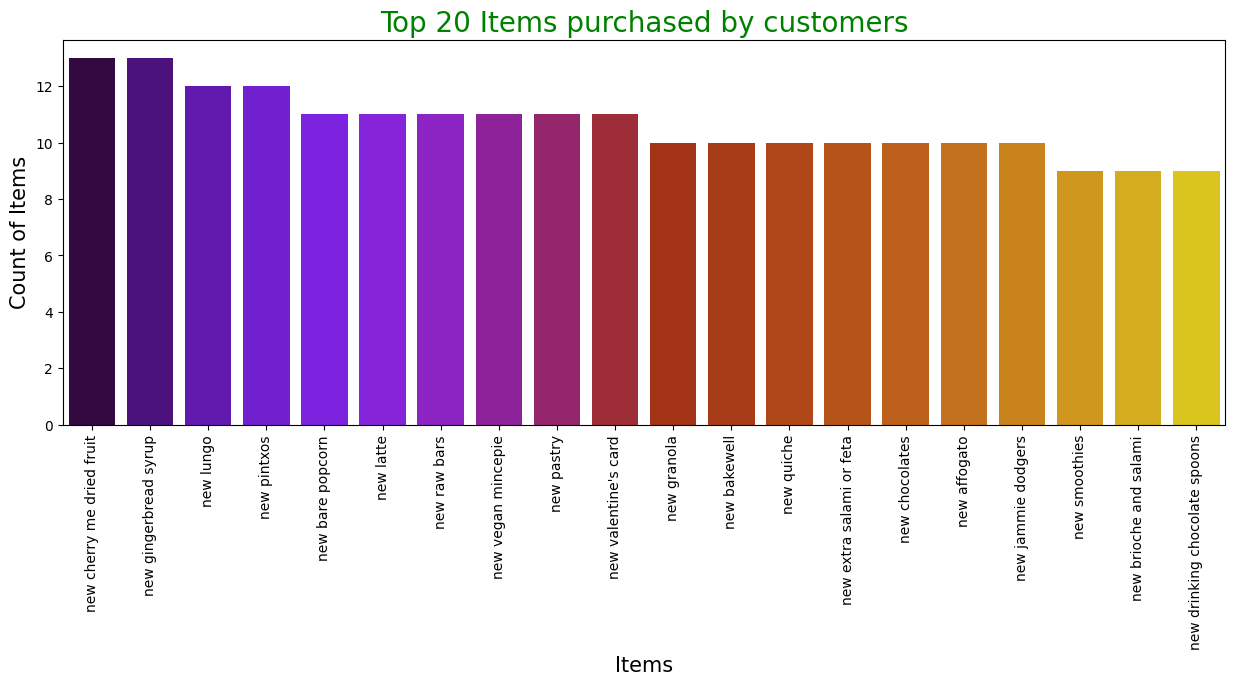

In [915]:
#Tạo bảng xác định 20 sản phẩm được mua nhiều nhất bởi khách hàng
plt.figure(figsize=(15,5)) # Tạo figure với kích thước 15x5 inches
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
# sns.barplot(x=df.Item.value_counts().head(20).index, y=df.Item.value_counts().head(20).values, palette='gnuplot'): Dòng này sử dụng thư viện Seaborn để vẽ biểu đồ cột. Cụ thể:
    # x là giá trị trục hoành (x-axis) và nó là danh sách các mặt hàng (items) xuất hiện trong dữ liệu. Để giới hạn biểu đồ đến 20 mặt hàng phổ biến nhất, bạn sử dụng df.Item.value_counts().head(20).index. df.Item.value_counts() đếm số lần xuất hiện của mỗi mặt hàng, .head(20) lấy ra 20 mặt hàng đầu tiên, và .index trả về tên của các mặt hàng đó.
    # y là giá trị trục tung (y-axis) và nó là số lượng của các mặt hàng tương ứng. df.Item.value_counts().head(20).values đếm số lần xuất hiện của mỗi mặt hàng, lấy 20 mặt hàng đầu tiên và trả về số lượng của chúng.
    # palette='gnuplot' chỉ định bảng màu được sử dụng trong biểu đồ. 
plt.xlabel('Items', size = 15)
plt.xticks(rotation=90)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

Coffee has the highest transactions.

Coke is the 20th most buyed product.

In [911]:
#Xác định những tháng xuất hiện trong Data Frame
months_in_df = df['month'].unique()
print(months_in_df)

['January' 'March' 'February' 'April' 'December' 'July' 'October' 'June'
 'May' 'August' 'November' 'September']


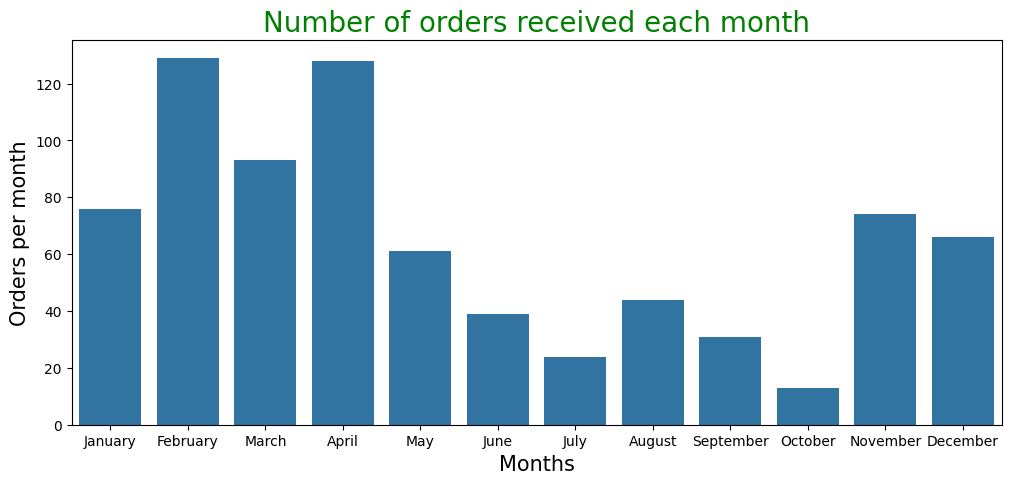

In [912]:

monthTran = df.groupby('month')['Transaction'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
# Do phương thức loc dùng để truy cập dữ liệu trong pandas
# Thứ tự sắp xếp trên do sau khi chuyển đổi từ số sang mô tả đại diện bằng chữ
# Phương thức loc lựa chọn hàng và cột theo nhãn, và mặc định sắp xếp theo thứ tự A->Z
monthTran.sort_values("monthorder",inplace=True)
# Sắp xếp lại data frame 'monthTran' dựa trên cột 'monthorder', đảm báo các tháng được hiển thị chính xác

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()

Most transactions were in **March, January, February, November, December**

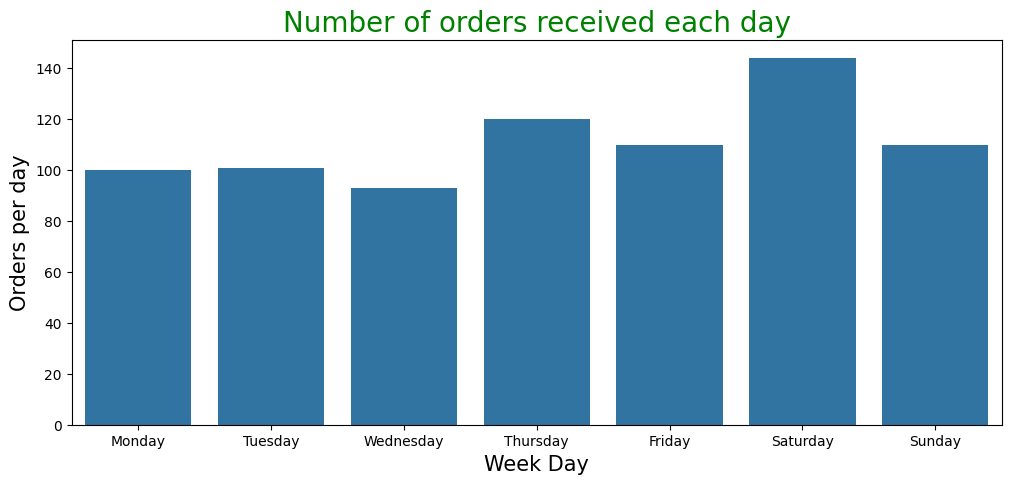

In [913]:
# Số lượng đơn hàng nhận được từng ngày trong tuần
weekTran = df.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'green', size = 20)
plt.show()


plt.show()

People order more on weekends.

In [914]:
# Số đơn hàng nhận được trong những khoảng thời gian trong ngày
hourTran = df.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:, "hourorder"] = [24,1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]

hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

ValueError: Length of values (19) does not match length of index (18)

People order more during the afternoon, since there are a lot of maximum order percentage between 12-5.

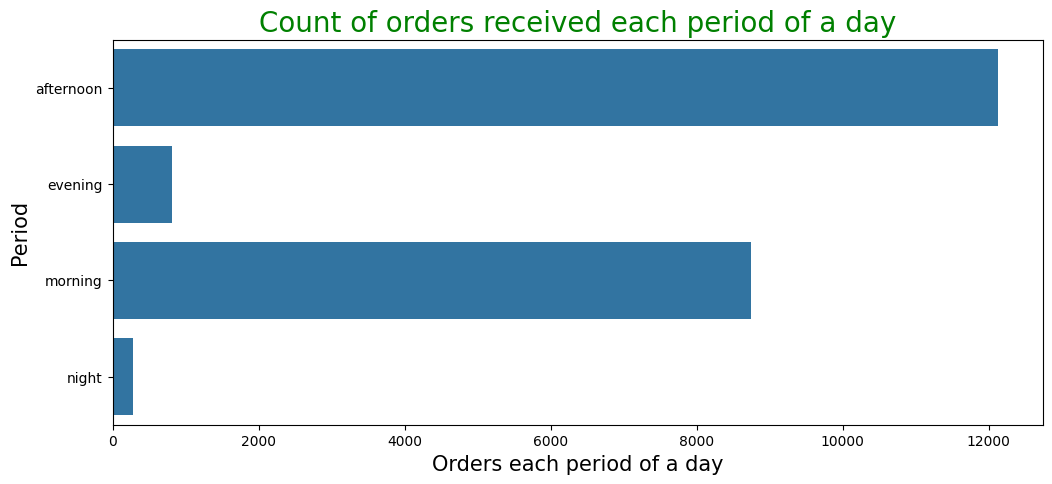

In [ ]:
# Số lượng đơn hàng nhận đưcoj trong mỗi buổi trong ngày
dayTran = df.groupby('period_day')['Transaction'].count().reset_index()
# dayTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
# dayTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Transaction", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Orders each period of a day', size = 15)
plt.title('Count of orders received each period of a day', color = 'green', size = 20)
plt.show()

People prefer to order in the morning and afternoon.

In [ ]:
# Tổng hợp những ngày có số lượng đơn hàng cao hơn 200 đơn/ngày
dates = df.groupby('date')['Transaction'].count().reset_index()
dates = dates[dates['Transaction']>=200].sort_values('date').reset_index(drop = True)

dates = pd.merge(dates, df[['date','weekday']], on = 'date', how = 'inner')
dates.drop_duplicates(inplace =True)
dates

,date,Transaction,weekday
0,2016-11-05,275,Saturday
275,2016-11-12,221,Saturday
496,2016-11-19,209,Saturday
705,2017-01-21,205,Saturday
910,2017-01-28,243,Saturday
1153,2017-02-04,292,Saturday
1445,2017-02-18,227,Saturday
1672,2017-03-04,257,Saturday
1929,2017-03-11,203,Saturday
2132,2017-03-25,246,Saturday


Mostly transactions are on weekends, as we saw earlier in our graph.

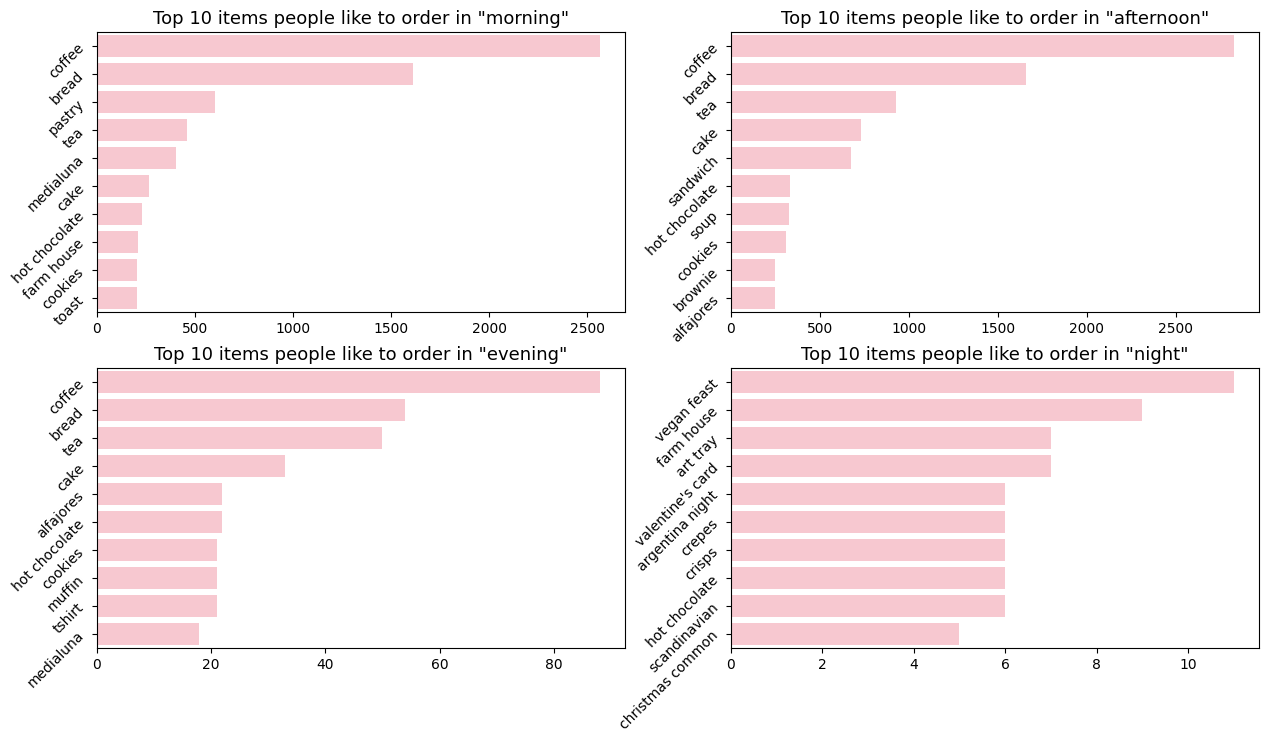

In [ ]:
# Top 10 sản phẩm được mua nhiều nhất của mỗi buổi trong ngày
data = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='pink')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(rotation=45)
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

# Apriori Algorithm

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
# Số lượng mỗi vật phẩm xuất hiện trong từng giao dịch
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
20348,10000,keeping it local,1
20349,10000,panatone,1
20350,10000,quiche,1
20351,10000,tartine,1


In [ ]:
Items_in_df=df['Item'].unique()
print(Items_in_df)

['bread' 'scandinavian' 'hot chocolate' 'jam' 'cookies' 'muffin' 'coffee'
 'pastry' 'medialuna' 'tea' 'tartine' 'basket' 'mineral water'
 'farm house' 'fudge' 'juice' "ella's kitchen pouches" 'victorian sponge'
 'frittata' 'hearty & seasonal' 'soup' 'pick and mix bowls' 'smoothies'
 'cake' 'mighty protein' 'chicken sand' 'coke' 'my-5 fruit shoot'
 'focaccia' 'sandwich' 'alfajores' 'eggs' 'brownie' 'dulce de leche'
 'honey' 'the bart' 'granola' 'fairy doors' 'empanadas' 'keeping it local'
 'art tray' 'bowl nic pitt' 'bread pudding' 'adjustment' 'truffles'
 'chimichurri oil' 'bacon' 'spread' 'kids biscuit' 'siblings'
 'caramel bites' 'jammie dodgers' 'tiffin' 'olum & polenta' 'polenta'
 'the nomad' 'hack the stack' 'bakewell' 'lemon and coconut' 'toast'
 'scone' 'crepes' 'vegan mincepie' 'bare popcorn' 'muesli' 'crisps'
 'pintxos' 'gingerbread syrup' 'panatone' 'brioche and salami'
 'afternoon with the baker' 'salad' 'chicken stew' 'spanish brunch'
 'raspberry shortbread sandwich' 'extra

In [ ]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

Item,adjustment,affogato,afternoon with the baker,afternoonwiththebaker,alfajores,americano,argentina night,argentinanight,art tray,arttray,...,truffles,tshirt,valentine's card,valentine'scard,vegan feast,vegan mincepie,veganfeast,veganmincepie,victorian sponge,victoriansponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head(10)

/var/folders/mq/sgf69n297rq1zmk8qcyg1xx40000gn/T/ipykernel_17802/1568820382.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  my_basket_sets = my_basket.applymap(encode)


Item,adjustment,affogato,afternoon with the baker,afternoonwiththebaker,alfajores,americano,argentina night,argentinanight,art tray,arttray,...,truffles,tshirt,valentine's card,valentine'scard,vegan feast,vegan mincepie,veganfeast,veganmincepie,victorian sponge,victoriansponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036499,(alfajores)
1,0.016563,(baguette)
2,0.316737,(bread)
3,0.039362,(brownie)
4,0.101319,(cake)
5,0.013087,(chicken stew)
6,0.464165,(coffee)
7,0.020243,(coke)
8,0.052858,(cookies)
9,0.039464,(farm house)


In [ ]:
# In ra danh sách các frequent itemsets
print(frequent_items['itemsets'])

0                  (alfajores)
1                   (baguette)
2                      (bread)
3                    (brownie)
4                       (cake)
5               (chicken stew)
6                     (coffee)
7                       (coke)
8                    (cookies)
9                 (farm house)
10                     (fudge)
11         (hearty & seasonal)
12             (hot chocolate)
13                       (jam)
14            (jammie dodgers)
15                     (juice)
16                 (medialuna)
17             (mineral water)
18                    (muffin)
19                    (pastry)
20                     (salad)
21                  (sandwich)
22              (scandinavian)
23                     (scone)
24                      (soup)
25            (spanish brunch)
26                       (tea)
27                    (tiffin)
28                     (toast)
29                  (truffles)
30          (bread, alfajores)
31         (coffee, alfajores)
32      

In [ ]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(toast),(coffee),0.033330,0.464165,0.023004,0.690184,1.486936,0.007533,1.729526,0.338767
27,(spanish brunch),(coffee),0.018096,0.464165,0.010531,0.581921,1.253693,0.002131,1.281659,0.206086
18,(medialuna),(coffee),0.060832,0.464165,0.034148,0.561345,1.209364,0.005912,1.221539,0.184332
20,(pastry),(coffee),0.083938,0.464165,0.046212,0.550548,1.186104,0.007251,1.192196,0.171280
23,(sandwich),(coffee),0.070340,0.464165,0.037113,0.527616,1.136699,0.004463,1.134321,0.129359
7,(cake),(coffee),0.101319,0.464165,0.053164,0.524723,1.130465,0.006136,1.127415,0.128420
1,(alfajores),(coffee),0.036499,0.464165,0.019119,0.523810,1.128498,0.002177,1.125253,0.118180
17,(juice),(coffee),0.038237,0.464165,0.019937,0.521390,1.123286,0.002188,1.119565,0.114119
12,(cookies),(coffee),0.052858,0.464165,0.027400,0.518375,1.116790,0.002865,1.112557,0.110413
15,(hot chocolate),(coffee),0.057152,0.464165,0.028934,0.506261,1.090692,0.002406,1.085260,0.088191


In [ ]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(toast),(coffee),0.033330,0.464165,0.023004,0.690184,1.486936,0.007533,1.729526,0.338767
27,(spanish brunch),(coffee),0.018096,0.464165,0.010531,0.581921,1.253693,0.002131,1.281659,0.206086
18,(medialuna),(coffee),0.060832,0.464165,0.034148,0.561345,1.209364,0.005912,1.221539,0.184332
20,(pastry),(coffee),0.083938,0.464165,0.046212,0.550548,1.186104,0.007251,1.192196,0.171280
23,(sandwich),(coffee),0.070340,0.464165,0.037113,0.527616,1.136699,0.004463,1.134321,0.129359
7,(cake),(coffee),0.101319,0.464165,0.053164,0.524723,1.130465,0.006136,1.127415,0.128420
1,(alfajores),(coffee),0.036499,0.464165,0.019119,0.523810,1.128498,0.002177,1.125253,0.118180
17,(juice),(coffee),0.038237,0.464165,0.019937,0.521390,1.123286,0.002188,1.119565,0.114119
12,(cookies),(coffee),0.052858,0.464165,0.027400,0.518375,1.116790,0.002865,1.112557,0.110413
15,(hot chocolate),(coffee),0.057152,0.464165,0.028934,0.506261,1.090692,0.002406,1.085260,0.088191


In [ ]:
frequent_items = apriori(my_basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

rules.sort_values('confidence', ascending=False)

for index, row in rules.iterrows():
    itemset = set(row['antecedents'])
    gian_hang = list(row['consequents'])[0]
    print(f"Gian hàng có chứa sản phẩm {gian_hang} nên kết hợp với gian hàng chứa sản phẩm {itemset}")


Gian hàng có chứa sản phẩm alfajores nên kết hợp với gian hàng chứa sản phẩm {'coffee'}
Gian hàng có chứa sản phẩm coffee nên kết hợp với gian hàng chứa sản phẩm {'alfajores'}
Gian hàng có chứa sản phẩm bread nên kết hợp với gian hàng chứa sản phẩm {'pastry'}
Gian hàng có chứa sản phẩm pastry nên kết hợp với gian hàng chứa sản phẩm {'bread'}
Gian hàng có chứa sản phẩm coffee nên kết hợp với gian hàng chứa sản phẩm {'brownie'}
Gian hàng có chứa sản phẩm brownie nên kết hợp với gian hàng chứa sản phẩm {'coffee'}
Gian hàng có chứa sản phẩm cake nên kết hợp với gian hàng chứa sản phẩm {'coffee'}
Gian hàng có chứa sản phẩm coffee nên kết hợp với gian hàng chứa sản phẩm {'cake'}
Gian hàng có chứa sản phẩm cake nên kết hợp với gian hàng chứa sản phẩm {'hot chocolate'}
Gian hàng có chứa sản phẩm hot chocolate nên kết hợp với gian hàng chứa sản phẩm {'cake'}
Gian hàng có chứa sản phẩm cake nên kết hợp với gian hàng chứa sản phẩm {'tea'}
Gian hàng có chứa sản phẩm tea nên kết hợp với gian hàng c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frequent_items = apriori(my_basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
sorted_rules = rules.sort_values('confidence', ascending=False)

# Tạo DataFrame từ dữ liệu luật
rule_data = []
for index, row in sorted_rules.iterrows():
    itemset = ", ".join(row['antecedents'])
    gian_hang = ", ".join(row['consequents'])
    confidence = row['confidence']
    lift = row['lift']
    rule_data.append([gian_hang, itemset, confidence, lift])

rule_df = pd.DataFrame(rule_data, columns=['Nhóm sản phẩm 1', 'Nhóm sản phẩm 2', 'Độ tin cậy', 'Hệ số tăng'])

# In ra DataFrame
print(rule_df)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


   Nhóm sản phẩm 1 Nhóm sản phẩm 2  Độ tin cậy  Hệ số tăng
0           coffee           toast    0.690184    1.486936
1           coffee  spanish brunch    0.581921    1.253693
2           coffee       medialuna    0.561345    1.209364
3           coffee          pastry    0.550548    1.186104
4           coffee        sandwich    0.527616    1.136699
5           coffee            cake    0.524723    1.130465
6           coffee       alfajores    0.523810    1.128498
7           coffee           juice    0.521390    1.123286
8           coffee         cookies    0.518375    1.116790
9           coffee   hot chocolate    0.506261    1.090692
10          coffee         brownie    0.483117    1.040830
11          coffee           scone    0.478992    1.031942
12           bread          pastry    0.336175    1.061372
13             tea            cake    0.228052    1.640133
14             tea        sandwich    0.200581    1.442564
15            cake   hot chocolate    0.194991    1.9245